In [1]:
#Install yfinance and ta for analysis
# !pip install ta yfinance --upgrade

In [2]:
import yfinance as yf
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import ta
from datetime import datetime

In [3]:
# Sector for financial fundamentals
sector_data = pd.read_csv('sector_averages.csv', index_col=0)
sector_data
cols = ['P/B', 'D/E', 'Y/Y Revenue Growth (S&P)', 'Gross Profit Margin']
sector_data[cols] = sector_data[cols].apply(pd.to_numeric, errors='coerce')
sector_data

,P/B,D/E,Y/Y Revenue Growth (S&P),Gross Profit Margin
Basic Materials,2.74,0.5902,4.0,7.09
Communication Services,5.10,0.7963,8.4,14.96
Consumer Cyclical,10.06,0.8996,4.1,6.10
Consumer Defensive,6.33,0.7755,3.3,4.91
Energy,1.99,0.5706,-1.8,6.88
Financial Services,2.33,2.4550,6.8,18.81
Healthcare,4.86,0.8420,8.0,4.67
Industrials,6.35,0.8789,4.5,7.26
Real Estate,3.02,1.0660,5.6,9.79
Tech,13.09,0.4845,14.2,17.45


In [4]:
# Tech Sector

In [5]:
# Step 1: Create screener params
tech_query = yf.EquityQuery('and', [
    yf.EquityQuery('is-in', ['exchange', 'NYQ', 'NMS', 'ASE', 'NCM']),
    yf.EquityQuery('is-in', ['sector', 'Technology']),
    yf.EquityQuery('LT', ['pricebookratio.quarterly', sector_data.loc['Tech', 'P/B']]),
    yf.EquityQuery('LT', ['totaldebtequity.lasttwelvemonths', sector_data.loc['Tech', 'D/E']]),
    yf.EquityQuery('GTE', ['totalrevenues1yrgrowth.lasttwelvemonths', 4]),
    yf.EquityQuery('GTE', ['grossprofitmargin.lasttwelvemonths', sector_data.loc['Tech', 'Gross Profit Margin']]),
    yf.EquityQuery('GTE', ['altmanzscoreusingtheaveragestockinformationforaperiod.lasttwelvemonths', 2.8]),
                   ])

In [6]:
# Step 2: Create a list of stock tickers from screened stocks
response = yf.screen(tech_query, sortField ='pricebookratio.quarterly', sortAsc=True, size=100)
print(f'Number of stocks retrieved: {response['total']}')
data = response['quotes']

tech_stocks = {stocks['displayName']: stocks['symbol'] for stocks in data}
print(tech_stocks)

Number of stocks retrieved: 9
{'Wix.com': 'WIX', 'Fair Isaac': 'FICO', 'Next Technology Holding': 'NXTT', 'Electro-Sensors': 'ELSE', 'Tuya': 'TUYA', 'Yalla': 'YALA', 'Quantum Computing': 'QUBT', 'M-tron Industries': 'MPTI', 'GitLab': 'GTLB'}


# Wix

In [7]:
wix = yf.Ticker('WIX')

## Yearly Net Income

In [8]:
# Wix net income by year
wix_income_y = wix.get_income_stmt()
wix_income_y.columns = wix_income_y.columns.astype(str).str[:4]
wix_income_y = wix_income_y.transpose()
wix_income_y

,TaxEffectOfUnusualItems,TaxRateForCalcs,NormalizedEBITDA,TotalUnusualItems,TotalUnusualItemsExcludingGoodwill,NetIncomeFromContinuingOperationNetMinorityInterest,ReconciledDepreciation,ReconciledCostOfRevenue,EBITDA,EBIT,...,OperatingExpense,ResearchAndDevelopment,SellingGeneralAndAdministration,SellingAndMarketingExpense,GeneralAndAdministrativeExpense,OtherGandA,GrossProfit,CostOfRevenue,TotalRevenue,OperatingRevenue
2024,1.229351e+06,0.089538,172476000.0,13730000.0,13730000.0,138322000.0,31115000.0,564635000.0,186206000.0,155091000.0,...,1.095874e+09,495281000.0,600593000.0,425457000.0,175136000.0,175136000.0,1.196015e+09,564635000.0,1.760650e+09,1.760650e+09
2023,-1.305138e+06,0.124263,78982000.0,-10503000.0,-10503000.0,33137000.0,26446000.0,512528000.0,68479000.0,42033000.0,...,1.040903e+09,481293000.0,559610000.0,399577000.0,160033000.0,160033000.0,1.049137e+09,512528000.0,1.561665e+09,1.561665e+09
2022,-1.809753e+07,0.091868,-242779000.0,-196994000.0,-196994000.0,-424863000.0,22857000.0,526227000.0,-439773000.0,-462630000.0,...,1.146792e+09,482861000.0,663931000.0,492886000.0,171045000.0,171045000.0,8.614390e+08,526227000.0,1.387666e+09,1.387666e+09
2021,7.223256e+07,0.270000,-296356000.0,267528000.0,267528000.0,-117209000.0,18881000.0,488579000.0,-28828000.0,-47709000.0,...,1.106612e+09,424937000.0,681675000.0,512027000.0,169648000.0,169648000.0,7.810780e+08,488579000.0,1.269657e+09,1.269657e+09


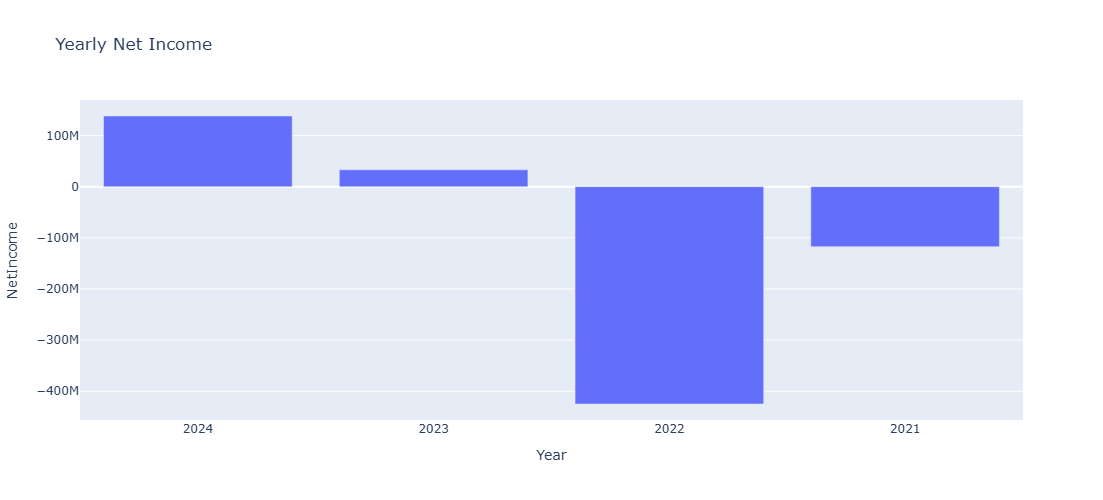

In [9]:
wix_income_y_plot = px.bar(wix_income_y, x=wix_income_y.index, y='NetIncome', title='Yearly Net Income', height=500)
wix_income_y_plot.update_layout(xaxis_title='Year')
wix_income_y_plot.show()

## Quarterly Net Income

In [10]:
# Wix net income by quarter
wix_income_q = wix.get_income_stmt(freq='quarterly')
wix_income_q = wix_income_q.transpose()
quarter_labels = wix_income_q.index.to_period('Q').astype(str)

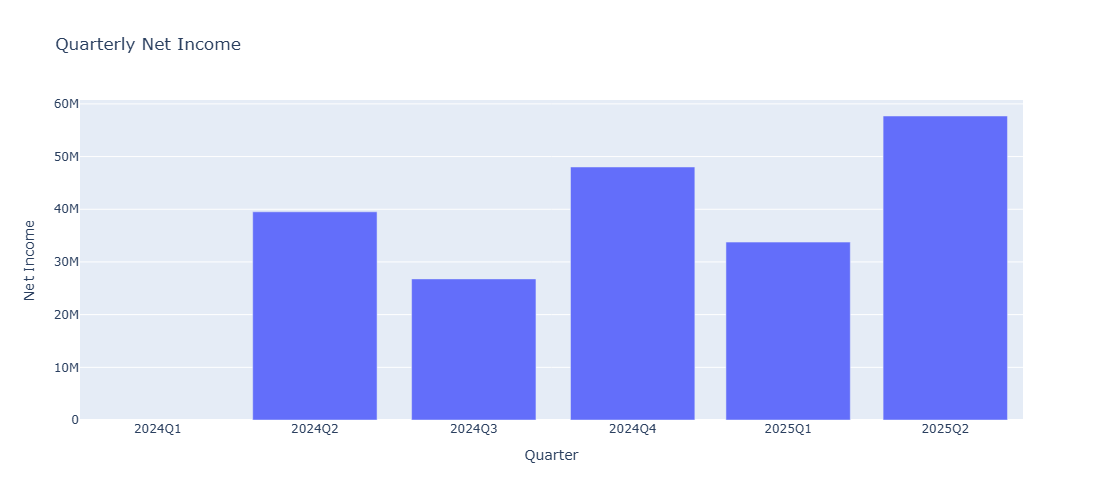

In [11]:
wix_income_q_plot = px.bar(wix_income_q, x=wix_income_q.index, y='NetIncome', 
                           title='Quarterly Net Income', height=500)
wix_income_q_plot.update_layout(xaxis_title='Quarter', yaxis_title='Net Income')
wix_income_q_plot.update_xaxes(tickvals=wix_income_q.index, ticktext=quarter_labels)
wix_income_q_plot.show()

## Yearly Shareholder Equity

In [12]:
# Wix Shareholder Equity Yearly
wix_balance = wix.get_balance_sheet()
wix_balance.columns = wix_balance.columns.astype(str).str[:4]
wix_balance = wix_balance.transpose()

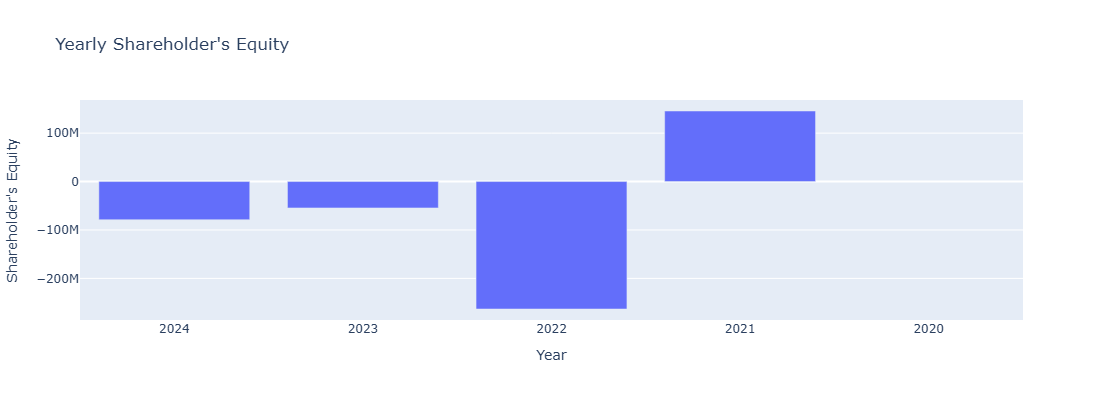

In [13]:
wix_se_bar = px.bar(wix_balance, x=wix_balance.index, y=wix_balance.StockholdersEquity, title="Yearly Shareholder's Equity", height=400)
wix_se_bar.update_layout(xaxis_title='Year', yaxis_title="Shareholder's Equity")
wix_se_bar.show()

## Quarterly Shareholder Equity

In [14]:
# Wix Shareholder Equity quarterly
wix_balance_q = wix.get_balance_sheet(freq='quarterly')
wix_balance_q = wix_balance_q.transpose()
quarter_labels = wix_balance_q.index.to_period('Q').astype(str)

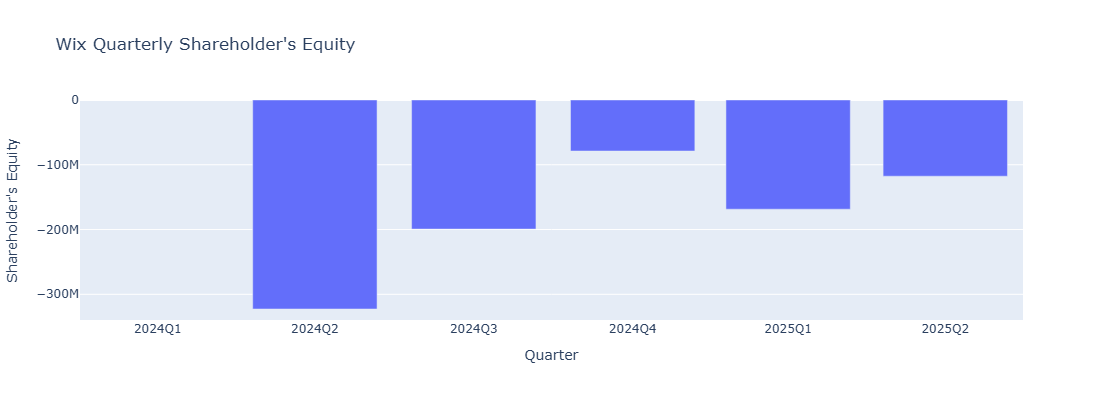

In [15]:
wix_se_q_bar = px.bar(wix_balance_q, x=wix_balance_q.index, y=wix_balance_q.StockholdersEquity, title="Wix Quarterly Shareholder's Equity",
                     height=400)
wix_se_q_bar.update_layout(xaxis_title='Quarter', yaxis_title="Shareholder's Equity")
wix_se_q_bar.update_xaxes(tickvals=wix_balance_q.index, ticktext=quarter_labels)
wix_se_q_bar.show()

## Insider and Institutional Stats

In [16]:
# Insider and institutional ownership
wix_holders = wix.major_holders
print(f'The percetnage held by insiders: {round(wix_holders.loc['insidersPercentHeld', 'Value'] * 100, 4)}%')
print(f'The percentage held by institutions: {wix_holders.loc['institutionsPercentHeld', 'Value'] * 100}%')

The percetnage held by insiders: 3.192%
The percentage held by institutions: 99.777%


In [17]:
wix.insider_purchases

,Insider Purchases Last 6m,Shares,Trans
0,Purchases,0,0
1,Sales,<NA>,0
2,Net Shares Purchased (Sold),0,0
3,Total Insider Shares Held,1777504,<NA>
4,% Net Shares Purchased (Sold),<NA>,<NA>
5,% Buy Shares,<NA>,<NA>
6,% Sell Shares,<NA>,<NA>


## Analyst Price Targets

In [18]:
wix_analyst = wix.analyst_price_targets
wix_upside_potential = wix_analyst['median'] / wix_analyst['current']
wix_risk_adjusted = (wix_analyst['low'] + wix_analyst['high'] + wix_analyst['mean']) / 3
print(f'The conservative analyst estimate for Wix is: {wix_analyst['low']}')
print(f'The median analyst estimate for Wix is: {wix_analyst['median']}')
print(f'The aggressive analyst estimate for Wix is: {wix_analyst['high']}')
print(f'The upside potential for Wix is: {round(wix_upside_potential * 100, 2)}%')
print(f'The risk-adjusted target for Wix is ${round(wix_risk_adjusted, 2)}')

The conservative analyst estimate for Wix is: 160.0
The median analyst estimate for Wix is: 200.0
The aggressive analyst estimate for Wix is: 255.0
The upside potential for Wix is: 184.08%
The risk-adjusted target for Wix is $206.56


## Yearly Operating Cash Flow and Free Cash Flow

In [19]:
wix_cashflow = wix.get_cash_flow()
wix_cashflow = wix_cashflow.fillna(0)
wix_cashflow.columns = wix_cashflow.columns.astype(str).str[:4]
wix_cashflow = wix_cashflow.transpose()

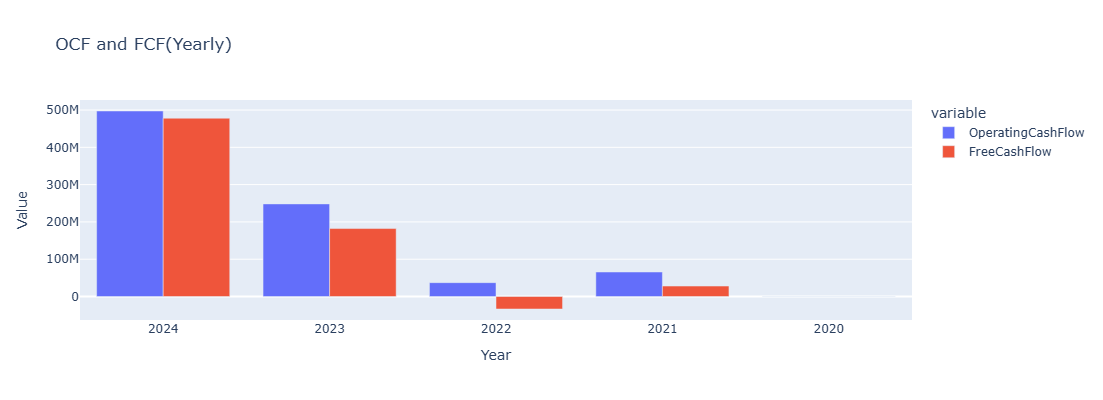

In [20]:
wix_ocf = px.bar(wix_cashflow, x=wix_cashflow.index, y=['OperatingCashFlow', 'FreeCashFlow'], title='OCF and FCF(Yearly)',
                barmode='group', height=400)
wix_ocf.update_layout(xaxis_title='Year', yaxis_title='Value')
wix_ocf.show()

## Quarterly OCF and FCF

In [21]:
wix_cashflow_q = wix.get_cash_flow(freq='quarterly')
wix_cashflow_q = wix_cashflow_q.transpose()
quarter_labels = wix_cashflow_q.index.to_period('Q').astype(str)

In [22]:
wix_cf_q = px.bar(wix_cashflow_q, x=wix_cashflow_q.index, y=['OperatingCashFlow', 'FreeCashFlow'], title='OCF and FCF(Quarterly)',
                barmode='group', height=400)
wix_cf_q.update_layout(xaxis_title='Quarter', yaxis_title='Cash')
wix_cf_q.update_xaxes(tickvals=wix_cashflow_q.index, ticktext=quarter_labels)
wix_cf_q.show()

## ROIC

In [23]:
# Step 1 Calculate NOPAT
wix_income_y['nopat'] = wix_income_y.EBIT * (1 - wix_income_y.TaxRateForCalcs)
wix_income_y.nopat

2024    1.412045e+08
2023    3.680985e+07
2022   -4.201291e+08
2021   -3.482757e+07
Name: nopat, dtype: float64

In [24]:
wix_balance = wix_balance.fillna(0)
wix_balance['invested_capital'] = wix_balance.LongTermDebt + wix_balance.TotalEquityGrossMinorityInterest - wix_balance.CashAndCashEquivalents
wix_balance.invested_capital

2024   -739725000.0
2023    -94393000.0
2022     58638000.0
2021    617334000.0
2020    834440000.0
Name: invested_capital, dtype: float64

In [25]:
wix_balance['roic'] = wix_income_y.nopat / wix_balance.invested_capital
wix_balance['roic']

2024   -0.190888
2023   -0.389964
2022   -7.164793
2021   -0.056416
2020         NaN
Name: roic, dtype: float64

## Free Cash Flow Margin Yearly

In [26]:
#Free Cash Flow Margin
wix_fcf_margin = wix_cashflow['FreeCashFlow'] / wix_income_y.TotalRevenue
wix_fcf_margin = wix_fcf_margin.dropna()

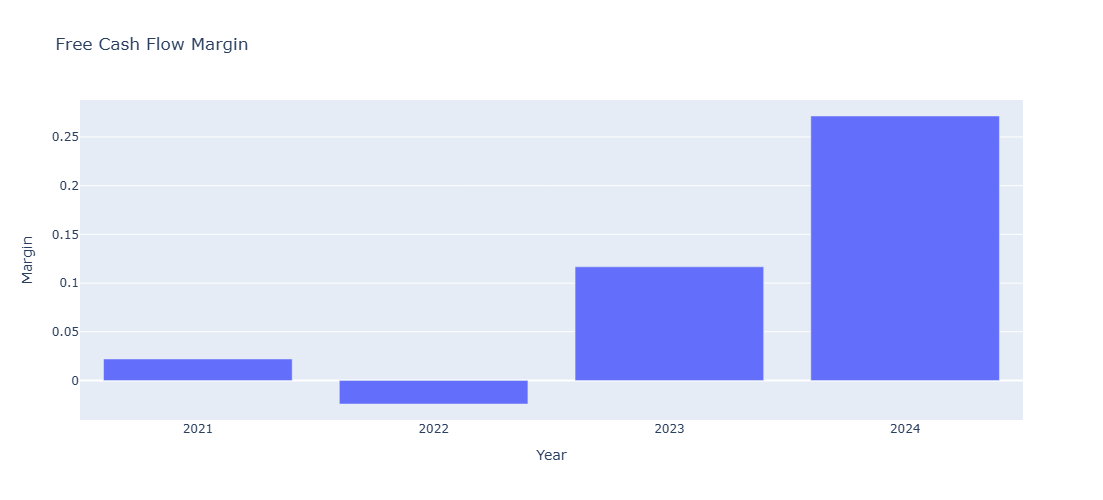

In [27]:
wix_fcf_margin_bar = px.bar(wix_fcf_margin, x=wix_fcf_margin.index, y=wix_fcf_margin.values, title='Free Cash Flow Margin',
                           height=500)
wix_fcf_margin_bar.update_layout(xaxis_title='Year', yaxis_title='Margin')
wix_fcf_margin_bar.show()

## Free Cash Flow Margin Quarterly

In [28]:
wix_fcf_margin_q = wix_cashflow_q['FreeCashFlow'] / wix_income_q.TotalRevenue
wix_fcf_margin_q = wix_fcf_margin_q.dropna()

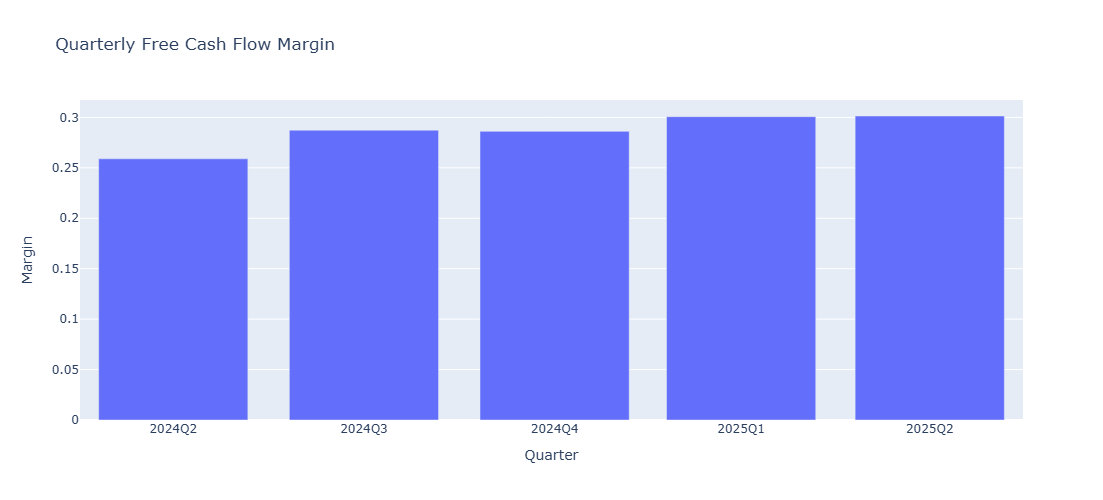

In [29]:
wix_fcf_margin_q_bar = px.bar(wix_fcf_margin_q, x=wix_fcf_margin_q.index, y=wix_fcf_margin_q.values, 
                              title='Quarterly Free Cash Flow Margin', height=500)
wix_fcf_margin_q_bar.update_layout(xaxis_title='Quarter', yaxis_title='Margin')
wix_fcf_margin_q_bar.update_xaxes(tickvals=wix_fcf_margin_q.index, ticktext=quarter_labels)
wix_fcf_margin_q_bar.show()

## Operating Income Growth

In [30]:
#Operating Income Growth last 3 years
loop = 1
oig_list = []
for oi in wix_income_y.OperatingIncome.values:
    previous_oi = oi
    if loop >= 2:
        oig = (current_oi - previous_oi) / abs(previous_oi)
        oig_list.append(oig)
    loop += 1
    current_oi = oi
print(oig_list)

[11.161889725528297, 1.028855487764278, 0.12343103946131587]


In [31]:
current_year = datetime.now().strftime('%Y')
current_year = pd.to_numeric(current_year)
previous_year = current_year - 1
years = [previous_year, previous_year - 1, previous_year - 2]
oig = pd.DataFrame({'Operating Income Growth': oig_list}, index=years)
oig.index = oig.index.astype(str)

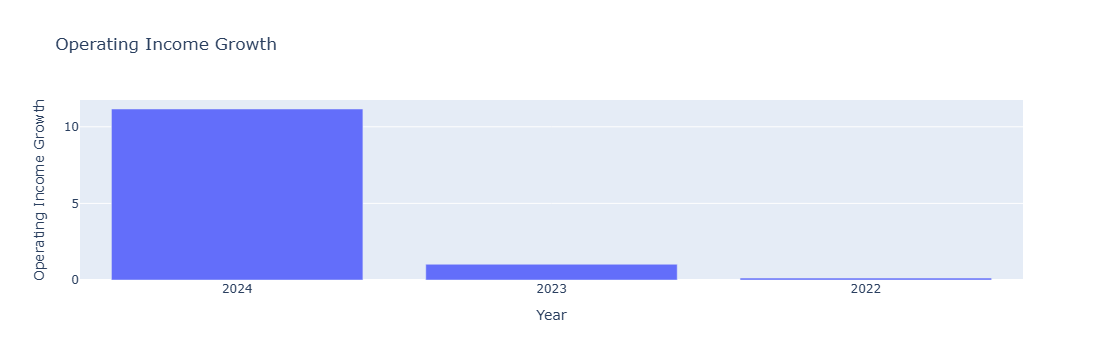

In [32]:
oig_bar = px.bar(oig, x=oig.index, y='Operating Income Growth', title='Operating Income Growth')
oig_bar.update_layout(xaxis_title='Year')
oig_bar.show()

## Operating Income Quarterly Growth

In [33]:
loop = 1
oig_q_list = []
for oi in wix_income_q.OperatingIncome.values:
    previous_oi = oi
    if loop >= 2:
        oig = (current_oi - previous_oi) / abs(previous_oi)
        oig_q_list.append(oig)
    loop += 1
    current_oi = oi
print(oig_q_list)

[0.18449405159738003, 0.03845086063298168, 0.3936392478526658, -0.09645166928858591, nan]


In [34]:
oig_q = pd.DataFrame({'Operating Income Growth': oig_q_list}, index=quarter_labels[:5])
oig_q = oig_q.dropna()
oig_q

,Operating Income Growth
2025Q2,0.184494
2025Q1,0.038451
2024Q4,0.393639
2024Q3,-0.096452


In [35]:
oig_q_bar = px.bar(oig_q, x=oig_q.index, y='Operating Income Growth', title='Quarterly Operating Income Growth',
                   height=400)
oig_q_bar.update_layout(xaxis_title='Quarter')
oig_q_bar.show()

## Yearly Operating Margin

In [36]:
#Operating Margin
wix_om = (wix_income_y.OperatingIncome / wix_income_y.TotalRevenue) * 100
wix_om

2024     5.687729
2023     0.527258
2022   -20.563522
2021   -25.639523
dtype: float64

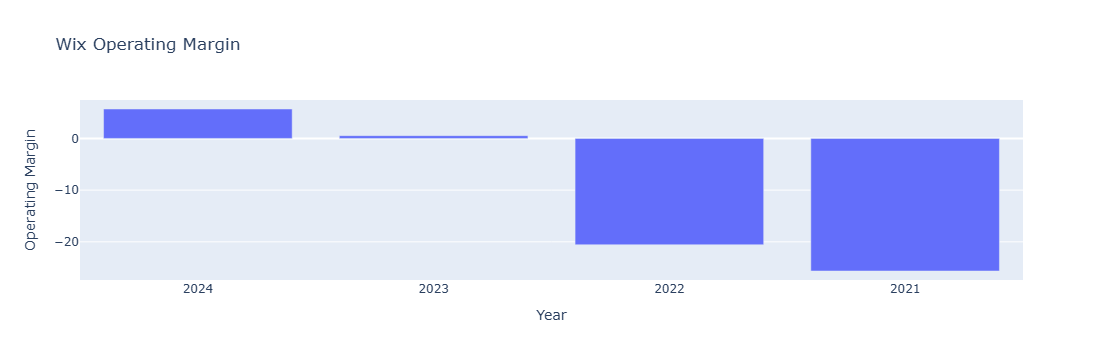

In [37]:
wix_om_bar = px.bar(wix_om, x=wix_om.index, y=wix_om.values, title='Wix Operating Margin')
wix_om_bar.update_layout(xaxis_title='Year', yaxis_title='Operating Margin')
wix_om_bar.show()

## Quarterly Operating Margin

In [38]:
#Operating Margin
wix_om_q = (wix_income_q.OperatingIncome / wix_income_q.TotalRevenue) * 100
wix_om_q = wix_om_q.dropna()

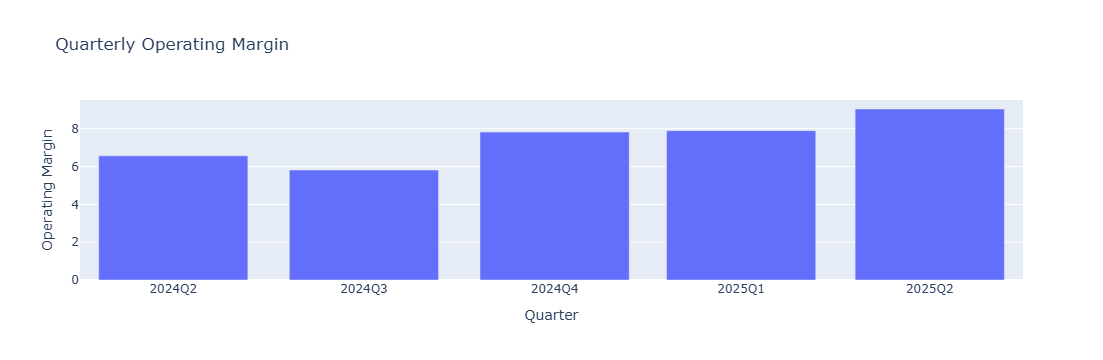

In [39]:
wix_om_q_bar = px.bar(wix_om_q, x=wix_om_q.index, y=wix_om_q.values, 
                              title='Quarterly Operating Margin')
wix_om_q_bar.update_layout(xaxis_title='Quarter', yaxis_title='Operating Margin')
wix_om_q_bar.update_xaxes(tickvals=wix_om_q.index, ticktext=quarter_labels)
wix_om_q_bar.show()

## Yearly Operating Margin Trend

In [40]:
#Operating Margin Trend
loop = 1
omt_list = []
for om in wix_om.values:
    previous_om = om
    if loop >= 2:
        omt = current_om - previous_om
        omt_list.append(omt)
    loop += 1
    current_om = om
print(omt_list)

[5.16047119718454, 21.090779536198184, 5.0760013456503295]


In [41]:
#Add to dataframe for easier graphing
omt = pd.DataFrame({'Operating Margin Trend': omt_list}, index=years)
omt.index = omt.index.astype(str)
omt

,Operating Margin Trend
2024,5.160471
2023,21.090780
2022,5.076001


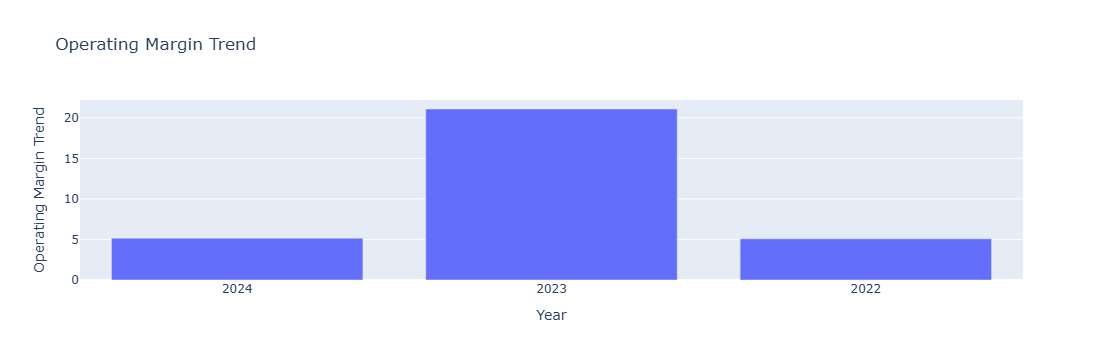

In [42]:
wix_omt_bar = px.bar(omt, x=omt.index, y='Operating Margin Trend', title='Operating Margin Trend')
wix_omt_bar.update_layout(xaxis_title="Year")
wix_omt_bar.show()

## Quarterly Operating Margin Trend

In [43]:
loop = 1
omt_q_list = []
for om in wix_om_q.values:
    previous_om = om
    if loop >= 2:
        omt = current_om - previous_om
        omt_q_list.append(omt)
    loop += 1
    current_om = om
print(omt_q_list)

[1.1461679308917843, 0.07446767529882248, 2.0103361214511866, -0.7522431567649903]


In [44]:
wix_omt_q = pd.DataFrame({'Quarterly Operating Margin Trend': omt_q_list}, index=quarter_labels[:4])
wix_omt_q

,Quarterly Operating Margin Trend
2025Q2,1.146168
2025Q1,0.074468
2024Q4,2.010336
2024Q3,-0.752243


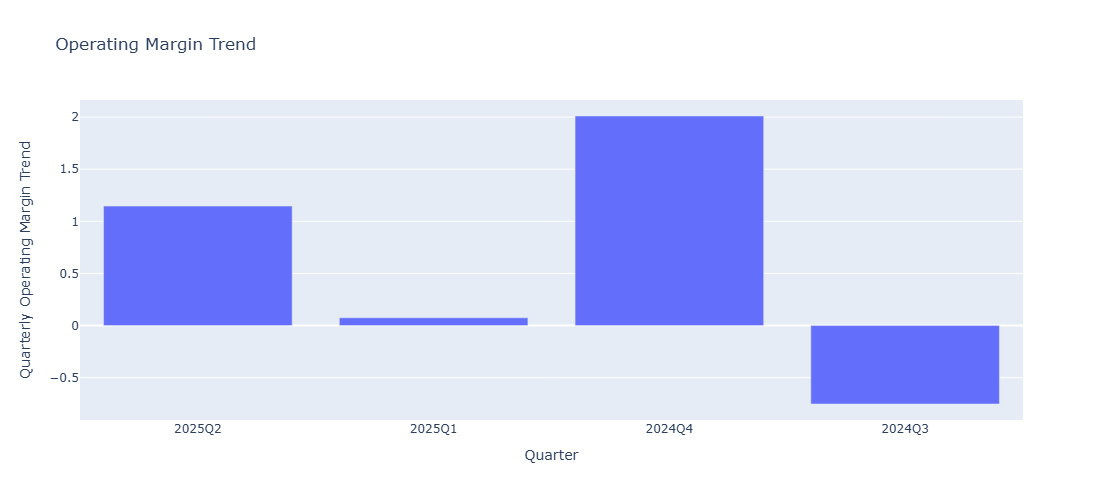

In [45]:
wix_omt_q_bar = px.bar(wix_omt_q, x=wix_omt_q.index, y='Quarterly Operating Margin Trend', 
                       title='Operating Margin Trend', height=500)
wix_omt_q_bar.update_layout(xaxis_title="Quarter")
wix_omt_q_bar.show()

## Yearly Gross Margin Stability

In [46]:
#Gross Margin Stability
wix_income_y['GrossMargin'] = wix_income_y.GrossProfit / wix_income_y.TotalRevenue

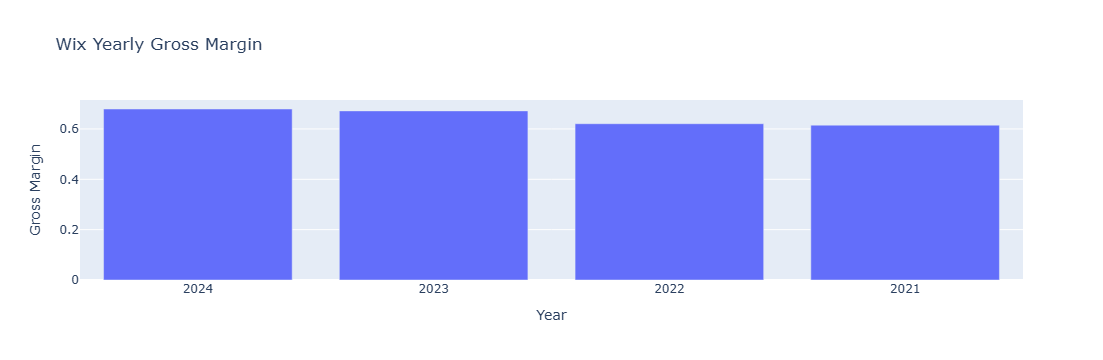

In [47]:
wix_gm_bar = px.bar(wix_income_y, x=wix_income_y.index, y=wix_income_y.GrossMargin, title='Wix Yearly Gross Margin')
wix_gm_bar.update_layout(xaxis_title='Year', yaxis_title='Gross Margin')
wix_gm_bar.show()

## Quarterly Gross Margin

In [48]:
grossmargin_q = wix_income_q.GrossProfit / wix_income_q.TotalRevenue
grossmargin_q = grossmargin_q.dropna()

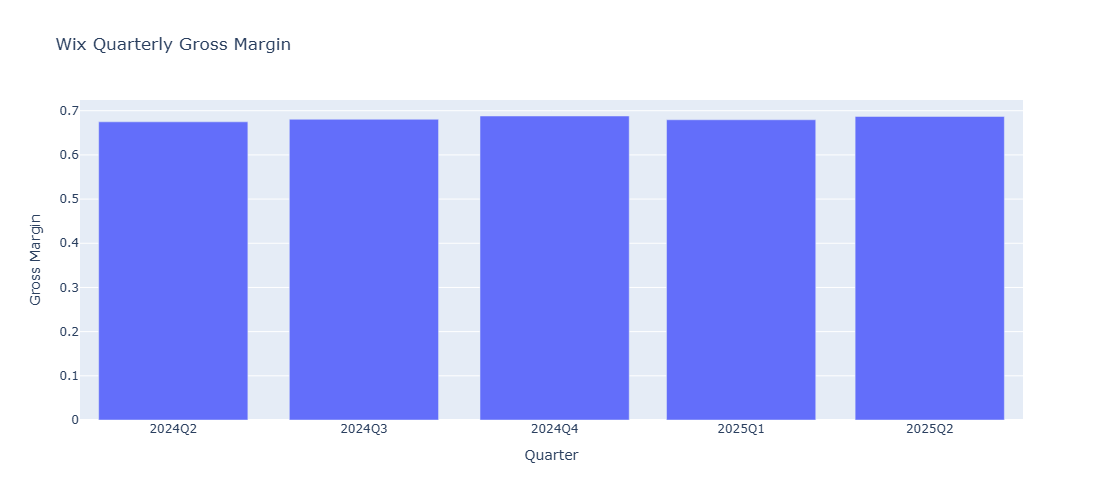

In [49]:
grossmargin_q_bar = px.bar(grossmargin_q, x=grossmargin_q.index, y=grossmargin_q.values, title='Wix Quarterly Gross Margin',
                          height=500)
grossmargin_q_bar.update_layout(xaxis_title='Quarter', yaxis_title='Gross Margin')
grossmargin_q_bar.update_xaxes(tickvals=grossmargin_q.index, ticktext=quarter_labels)
grossmargin_q_bar.show()

# Technical Analysis

In [50]:
history_1year = wix.history(period='1y')
history_3year = wix.history(period='3y')

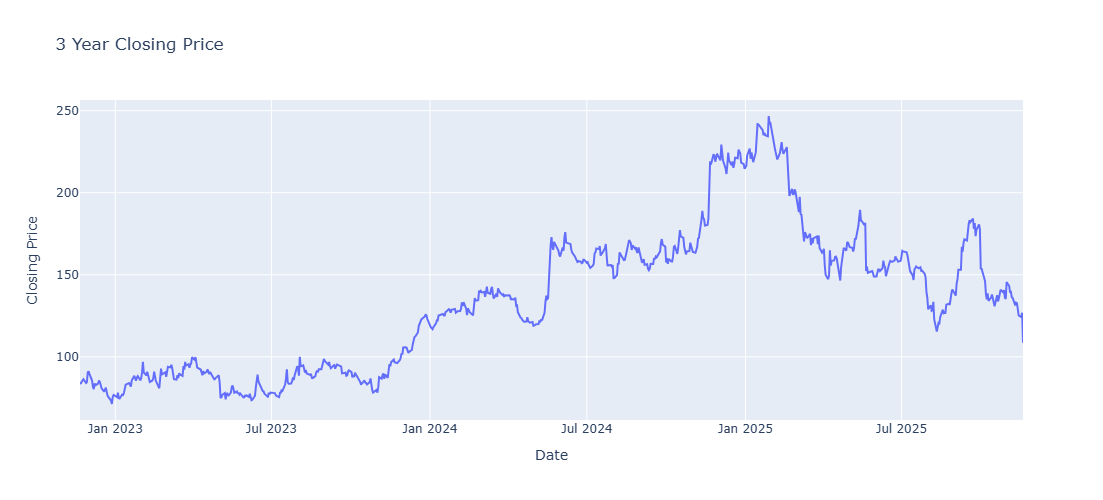

In [51]:
# Closing Price
price_plot = px.line(history_3year, x=history_3year.index, y=history_3year.Close, title='3 Year Closing Price', height=500)
price_plot.update_layout(xaxis_title='Date', yaxis_title='Closing Price')
price_plot.show()

In [52]:
wix_rsi = ta.momentum.RSIIndicator(close=history_3year.Close, window=14)
rsi = wix_rsi.rsi()

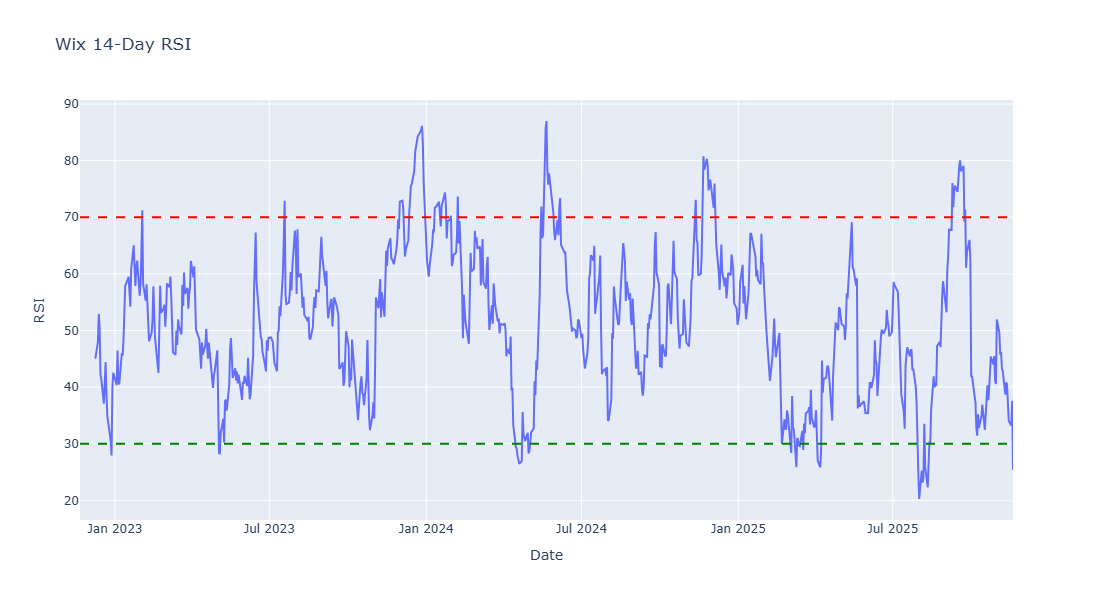

In [53]:
# RSI
rsi_plot = px.line(history_3year, x=history_3year.index, y=wix_rsi.rsi(), title='Wix 14-Day RSI', height=600)
rsi_plot.update_layout(yaxis_title='RSI')
rsi_plot.add_hline(y=70, line_dash='dash', line_color='red')
rsi_plot.add_hline(y=30, line_dash='dash', line_color='green')
rsi_plot.show()

Text(0, 0.5, 'Price')

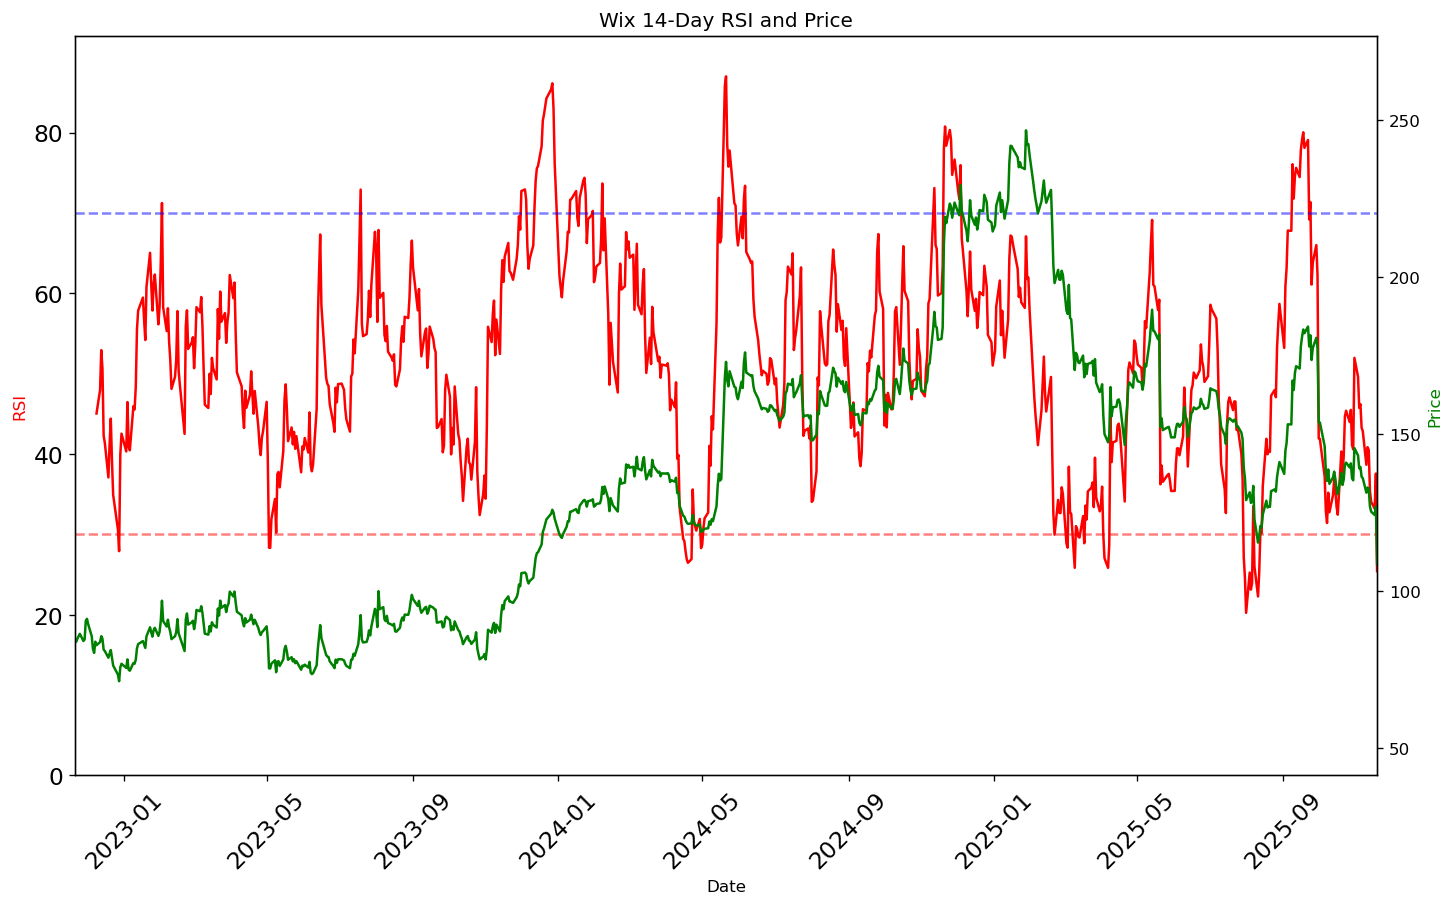

In [54]:
# RSI and Price
plt.figure(figsize=(14,8), dpi=120)
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.title('Wix 14-Day RSI and Price')

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_xlim([history_3year.index.min(), history_3year.index.max()])
ax1.set_ylim([0, rsi.max() + 5])
ax2.set_ylim([history_3year.Close.min() - 30, history_3year.Close.max() + 30])

ax1.plot(history_3year.index, rsi.values, color='red')
ax2.plot(history_3year.index, history_3year.Close, color='green')
ax1.axhline(y=70, linestyle='--', color='blue', alpha=0.5)
ax1.axhline(y=30, linestyle='--', color='red', alpha=0.5)
ax1.set_xlabel('Date')
ax1.set_ylabel('RSI', color='red')
ax2.set_ylabel('Price', color='green')

In [55]:
wix_macd = ta.trend.MACD(close=history_1year.Close, window_slow=26, window_fast=12, window_sign=9)
macd = wix_macd.macd()
signal_line = wix_macd.macd_signal()
histogram = wix_macd.macd_diff()

In [56]:
macd_df = pd.DataFrame({'MACD': macd, 'Signal': signal_line, 'Histogram': histogram}, index=history_1year.index)

In [58]:
history_1year['bullish_signal'] = (macd > signal_line) & (macd.shift(1) < signal_line.shift(1))
history_1year['bearish_signal'] = (macd < signal_line) & (macd.shift(1) > signal_line.shift(1))
buy_dates = history_1year[history_1year['bullish_signal']].index
sell_dates = history_1year[history_1year['bearish_signal']].index

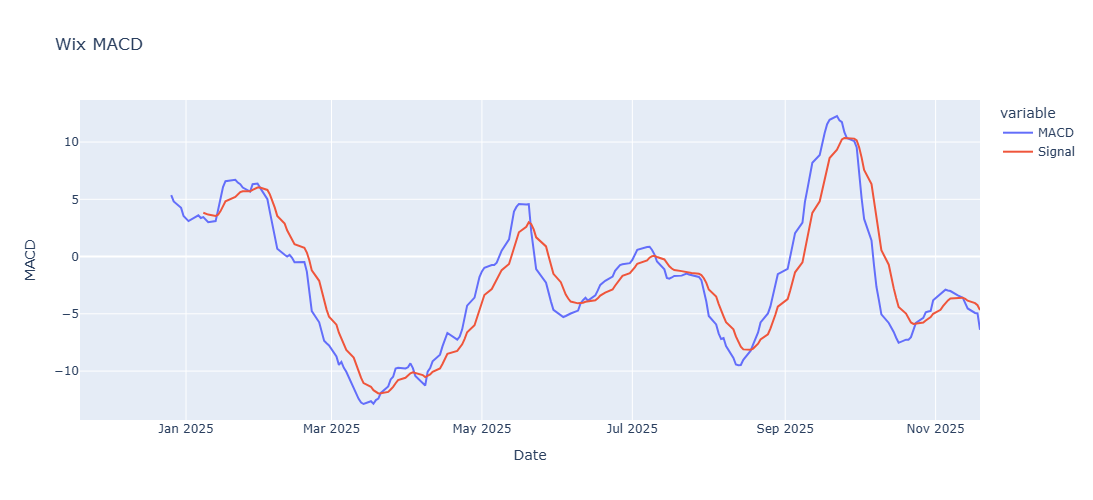

In [59]:
macd_plot = px.line(macd_df, x=macd_df.index, y=['MACD', 'Signal'], title='Wix MACD', height=500)
macd_plot.update_layout(yaxis_title='MACD')
macd_plot.show()

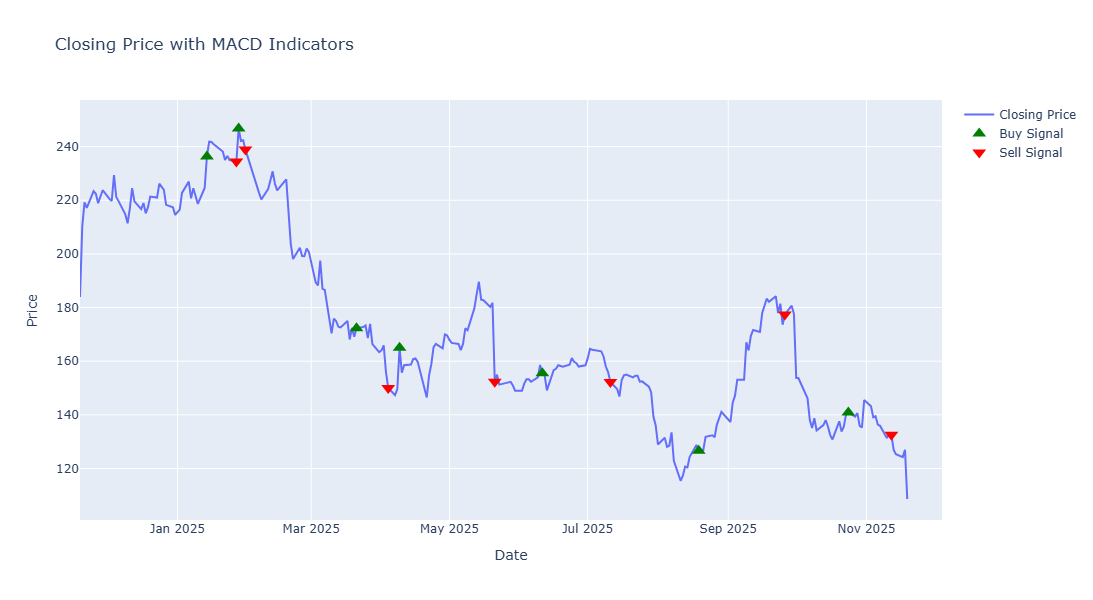

In [60]:
price_signals = go.Figure()
price_signals.add_trace(go.Scatter(x=history_1year.index, y=history_1year.Close, mode='lines', name='Closing Price'))
price_signals.add_trace(go.Scatter(x=buy_dates, y=history_1year.loc[buy_dates, 'Close'], mode='markers', marker_symbol='triangle-up',
                              marker_color='green', name='Buy Signal', marker_size=12))
price_signals.add_trace(go.Scatter(x=sell_dates, y=history_1year.loc[sell_dates, 'Close'], mode='markers', marker_symbol='triangle-down',
                               marker_color='red', name='Sell Signal', marker_size=12))
price_signals.update_layout(yaxis_title='Price', xaxis_title='Date', height=600, title='Closing Price with MACD Indicators')
price_signals.show()

### Stochastic Oscillator

In [61]:
#Stochastic Oscillator
wix_stoch = ta.momentum.StochasticOscillator(high=history_1year['High'], close=history_1year['Close'], low=history_1year['Low'],
                                                  window=14, smooth_window=3)

In [62]:
history_1year['%K'] = wix_stoch.stoch()
history_1year['%D'] = wix_stoch.stoch_signal()

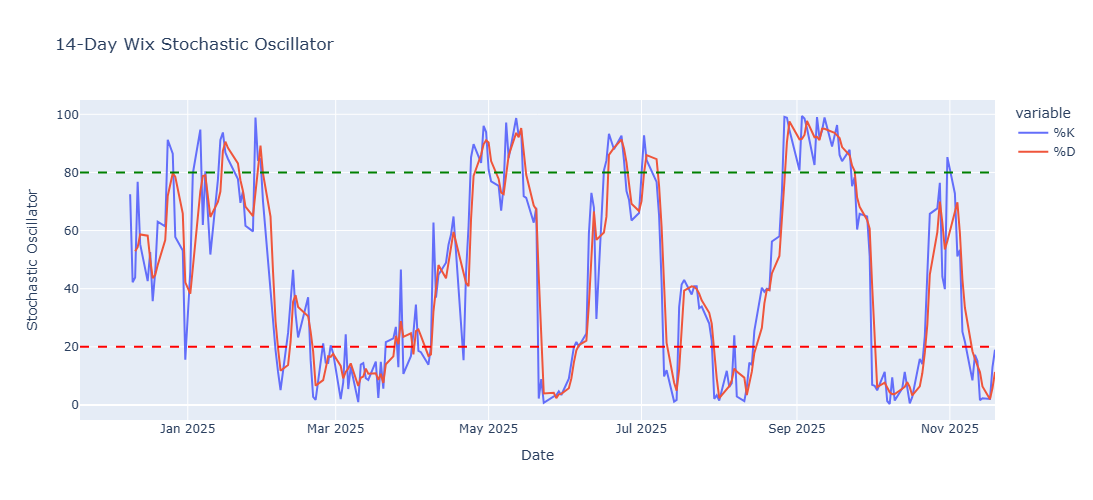

In [63]:
wix_stoch_plot = px.line(history_1year, x=history_1year.index, y=['%K', '%D'], title='14-Day Wix Stochastic Oscillator', height=500)
wix_stoch_plot.update_layout(xaxis_title='Date', yaxis_title='Stochastic Oscillator')
wix_stoch_plot.add_hline(y=80, line_dash='dash', line_color='green')
wix_stoch_plot.add_hline(y=20, line_dash='dash', line_color='red')
wix_stoch_plot.show()

In [64]:
history_1year['bullish_stoch'] = (history_1year['%K'] > history_1year['%D']) & (
    history_1year['%K'].shift(1) < history_1year['%D'].shift(1))
history_1year['bearish_stoch'] = (history_1year['%K'] < history_1year['%D']) & (
    history_1year['%K'].shift(1) > history_1year['%D'].shift(1))
buy_dates_s = history_1year[history_1year['bullish_stoch']].index
sell_dates_s = history_1year[history_1year['bearish_stoch']].index

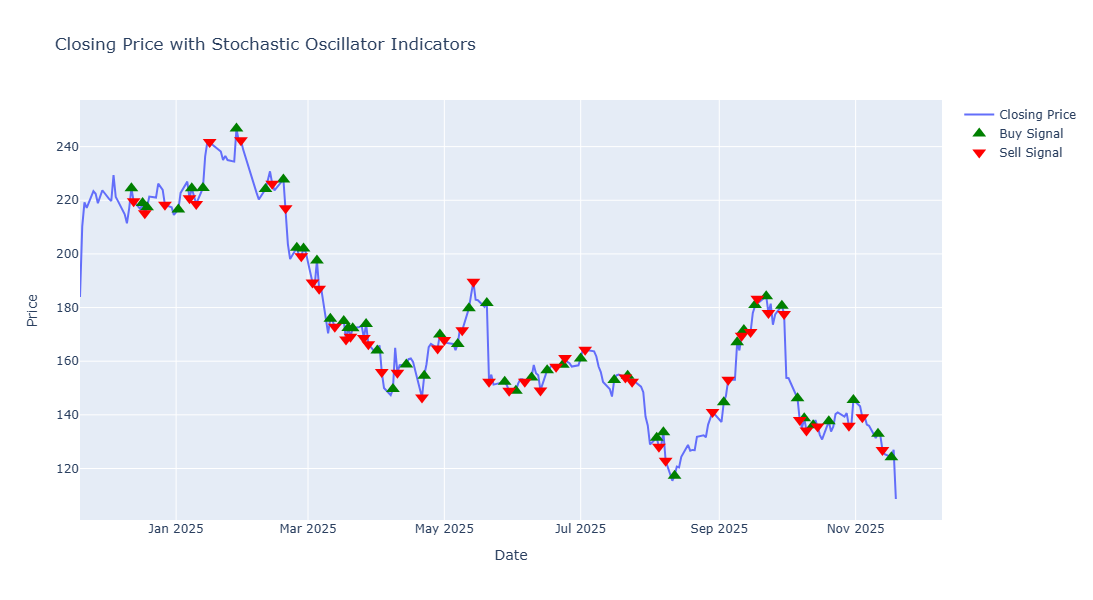

In [65]:
price_stoch = go.Figure()
price_stoch.add_trace(go.Scatter(x=history_1year.index, y=history_1year.Close, mode='lines', name='Closing Price'))
price_stoch.add_trace(go.Scatter(x=buy_dates_s, y=history_1year.loc[buy_dates_s, 'Close'], mode='markers', marker_symbol='triangle-up',
                              marker_color='green', name='Buy Signal', marker_size=12))
price_stoch.add_trace(go.Scatter(x=sell_dates_s, y=history_1year.loc[sell_dates_s, 'Close'], mode='markers', marker_symbol='triangle-down',
                               marker_color='red', name='Sell Signal', marker_size=12))
price_stoch.update_layout(yaxis_title='Price', xaxis_title='Date', height=600, title='Closing Price with Stochastic Oscillator Indicators')
price_stoch.show()